In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


In [3]:
# Read Data
import numpy as np     
import pandas as pd   
import seaborn as sns
import matplotlib.pyplot as plt

# ML model building; Pre Processing & Evaluation
from sklearn.model_selection import train_test_split                     # split  data into training and testing sets
from sklearn.linear_model import LinearRegression, Lasso, Ridge          # Linear Regression, Lasso and Ridge
from sklearn.tree import DecisionTreeRegressor                           # Decision tree Regression
from sklearn.ensemble import RandomForestRegressor                       # this will make a Random Forest Regression
from sklearn import svm                                                  # this will make a SVM classificaiton
from sklearn.svm import SVC                                              # import SVC from SVM

from sklearn.metrics import confusion_matrix, classification_report      # this creates a confusion matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import roc_curve,auc                                # ROC
from sklearn.preprocessing import StandardScaler                         # Standard Scalar
from sklearn.model_selection import GridSearchCV                         # this will do cross validation
from sklearn.decomposition import PCA                                    # to perform PCA to plot the data

import warnings                                                          # Ignore Warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/Premalatha-success/Yhills_July12_Analytics/main/concrete.csv')
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [5]:
df.shape

(1030, 9)

In [6]:
df.shape

(1030, 9)

In [7]:
#check datatype
df.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [9]:
df.isnull()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
1025,False,False,False,False,False,False,False,False,False
1026,False,False,False,False,False,False,False,False,False
1027,False,False,False,False,False,False,False,False,False
1028,False,False,False,False,False,False,False,False,False


In [10]:
df.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

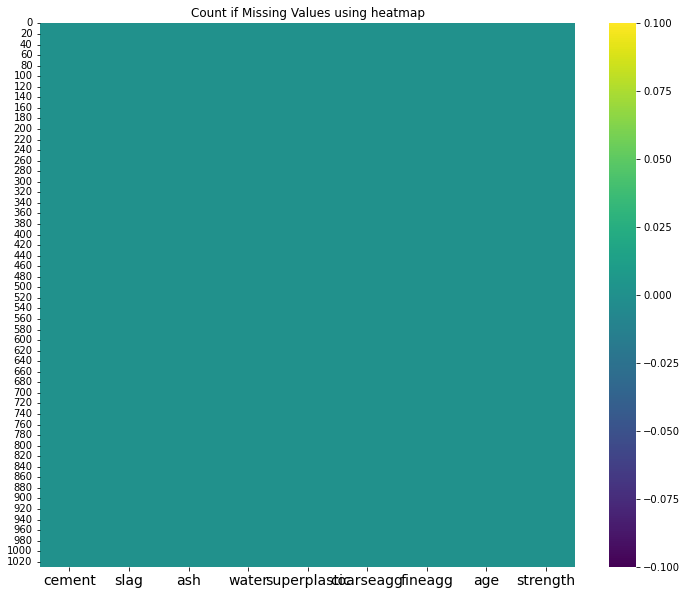

In [11]:
# Missing value representation using heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df.isnull(), cmap='viridis')
plt.xticks(fontsize=14)
plt.title("Count if Missing Values using heatmap")
plt.show()

In [12]:
for column in df.columns:
    print(column ,"=>",df[column].nunique())

cement => 278
slag => 185
ash => 156
water => 195
superplastic => 111
coarseagg => 284
fineagg => 302
age => 14
strength => 845


In [13]:
categoricalFeature = [feature for feature in df.columns if df[feature].dtype=='o']
categoricalFeature

[]

In [14]:
for feature in categoricalFeature:
    print("feature is {} and number of categories are {}".format(feature,len(df[feature].nunique())))

In [15]:
colnames_numerics_only = df.select_dtypes(include=np.number).columns.tolist()
colnames_numerics_only

['cement',
 'slag',
 'ash',
 'water',
 'superplastic',
 'coarseagg',
 'fineagg',
 'age',
 'strength']

In [16]:
discrete_feature = [feature for feature in colnames_numerics_only if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))
print("Discrete variable : ",discrete_feature)

Discrete Variables Count: 1
Discrete variable :  ['age']


In [17]:
continuous_features = [feature for feature in colnames_numerics_only if feature not in discrete_feature+['strength']]
print("Continuous feature Count {}".format(len(continuous_features)))
print("Countinous feature : ",continuous_features)

Continuous feature Count 7
Countinous feature :  ['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg']


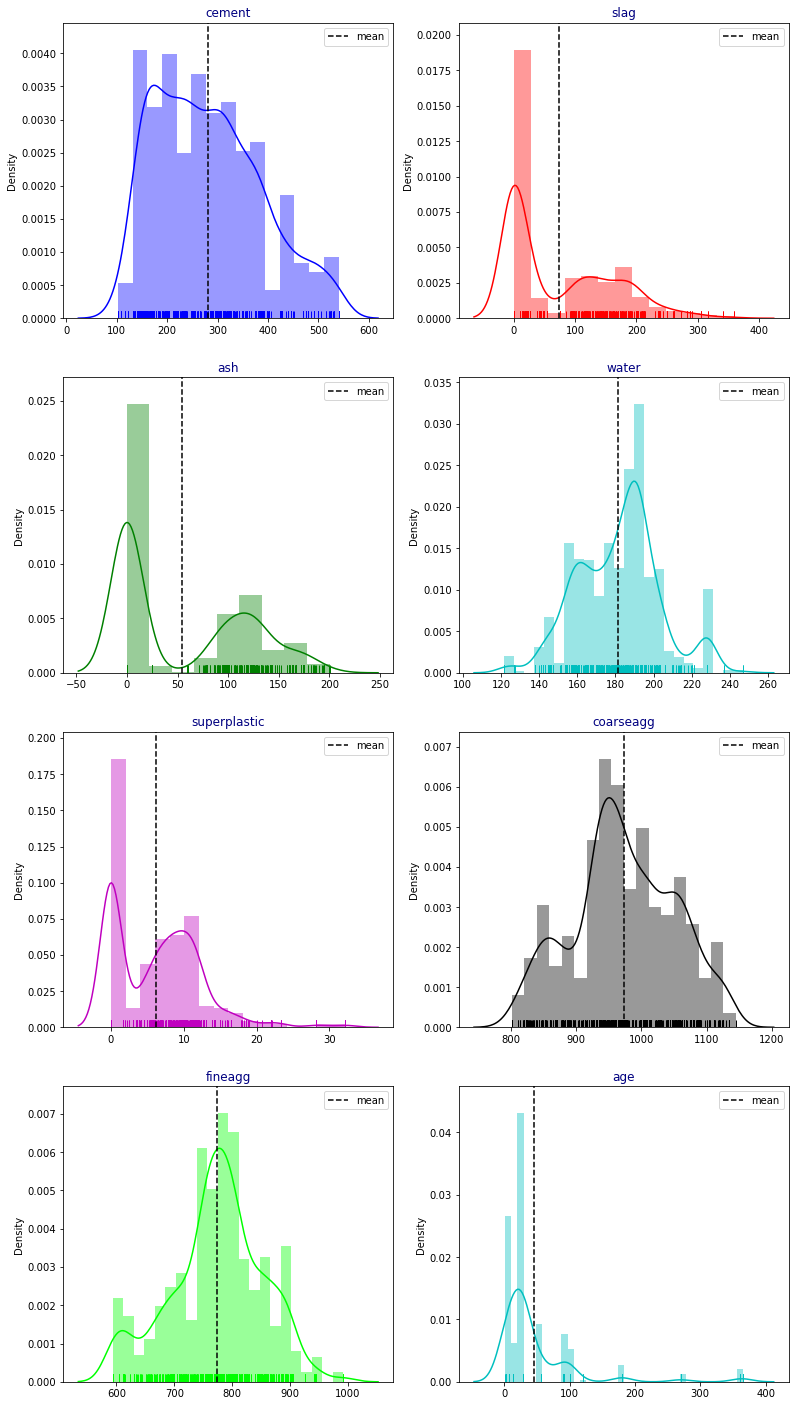

In [18]:
# plot a univariate distribution of continues observations
import itertools
columns = ['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg', 'age']
length = len(columns)
cs = ["b","r","g","c","m","k","lime","c"]

fig = plt.figure(figsize=(13,25))

for i,j,k in itertools.zip_longest(columns, range(length),cs):
    plt.subplot(4,2,j+1)
    ax = sns.distplot(df[i], color=k, rug=True)
    plt.axvline(df[i].mean(), linestyle="dashed", label="mean", color="k")
    plt.legend(loc="best")
    plt.title(i,color="navy")
    plt.xlabel("")

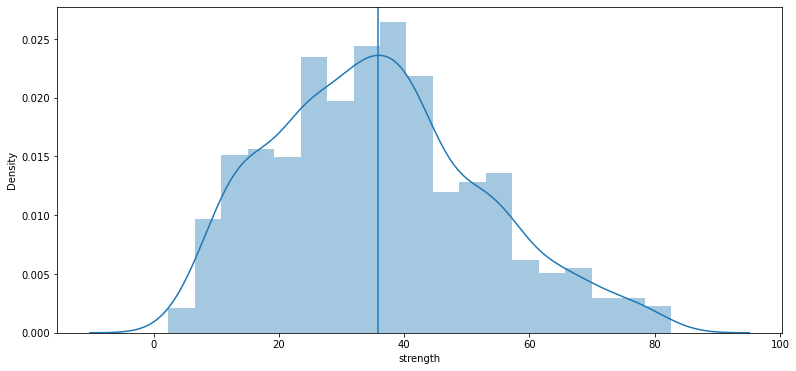

In [19]:
plt.figure(figsize=(13,6))
sns.distplot(df['strength'])
plt.axvline(df["strength"].mean())
plt.show()

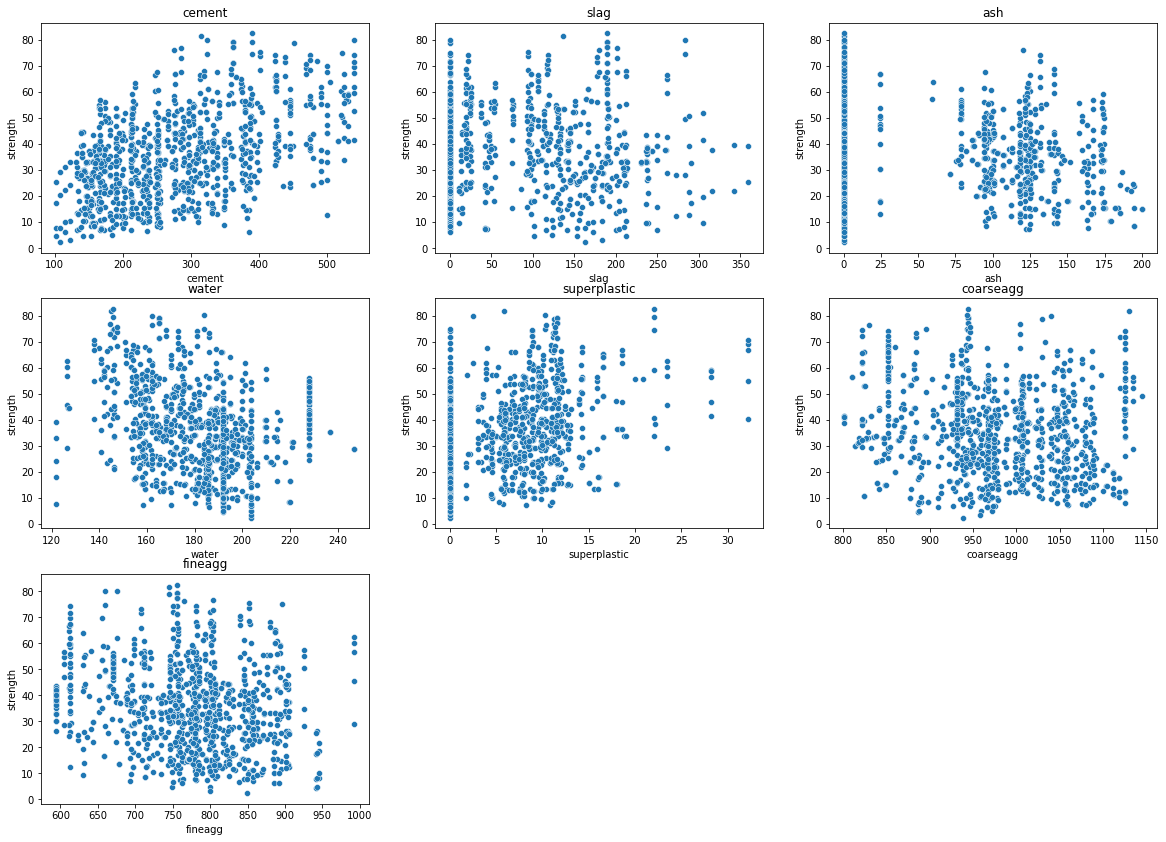

In [20]:
data=df.copy()
plt.figure(figsize=(20,60))
plotnumber = 1
for i in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.scatterplot(df[i],df['strength'])
    plt.xlabel(i)
    plt.ylabel('strength')
    plt.title(i)
    plotnumber+=1
plt.show()
    

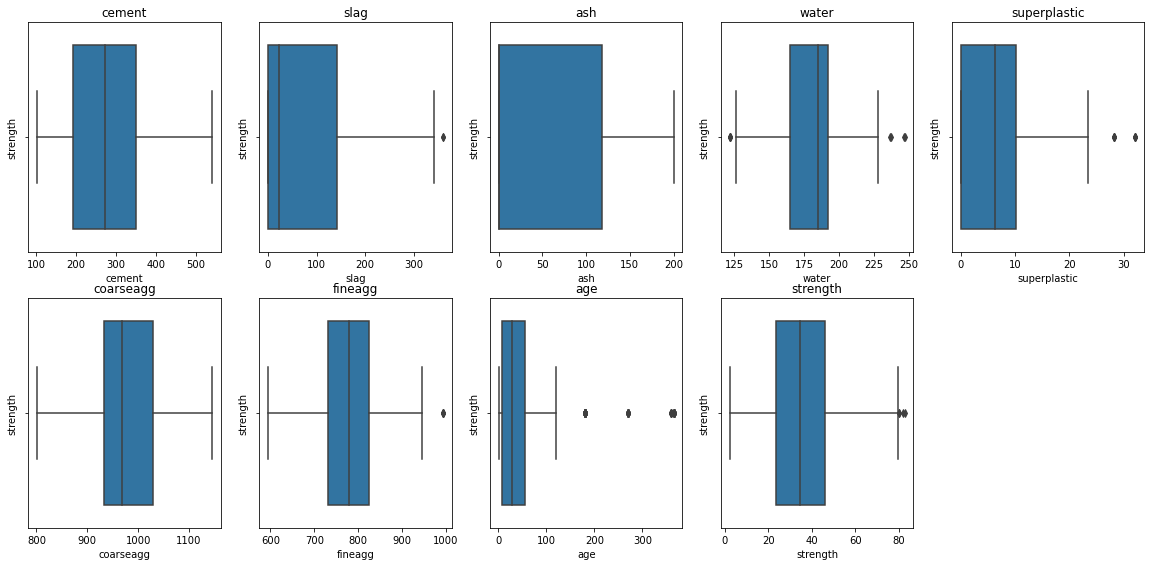

In [21]:
plt.figure(figsize=(20,60))
plotnumber=1
for i in colnames_numerics_only:
    ax = plt.subplot(12,5,plotnumber)
    sns.boxplot(df[i])
    plt.xlabel(i)
    plt.ylabel('strength')
    plt.title(i)
    plotnumber+=1
plt.show()
    

In [22]:
df.corr()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplastic,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarseagg,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fineagg,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


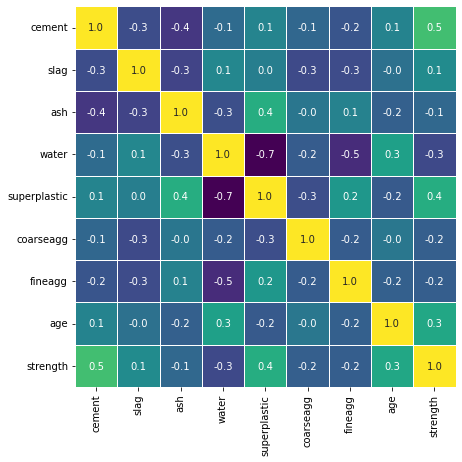

In [23]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True, cbar=False, cmap='viridis', fmt='.1f', linewidth=1, square=True)
plt.show()

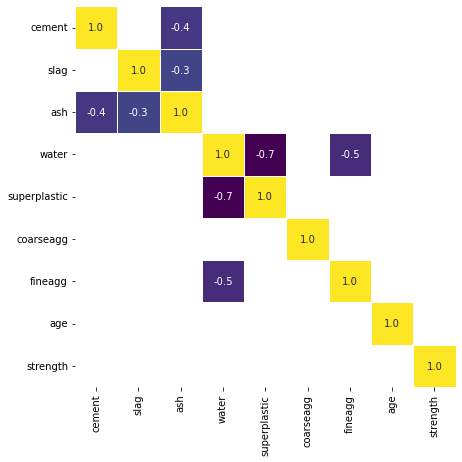

In [24]:
# highlight only features have correlation between 0.5 and -0.3
plt.figure(figsize=(15,7))
sns.heatmap(df.corr()[(df.corr()>=0.5)|(df.corr() <= -0.3)], annot=True, cbar=False,
                                 cmap='viridis', linewidth=1, fmt='.1f', square=True)
plt.show()

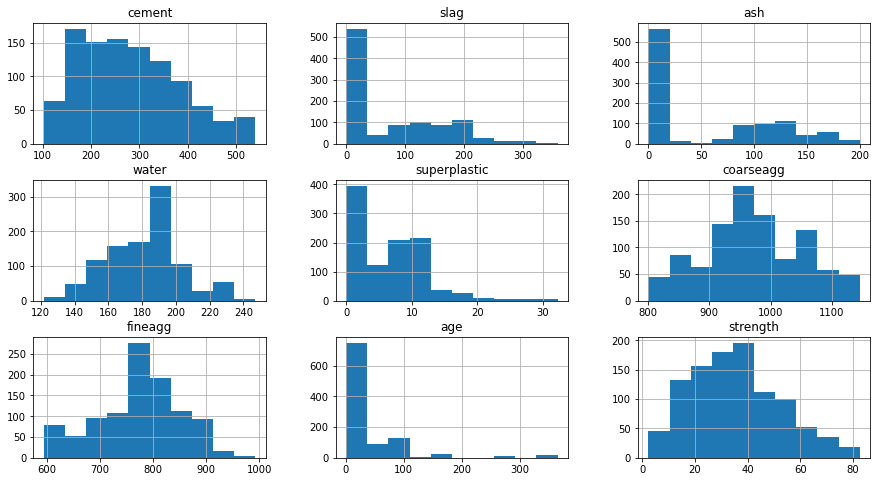

In [25]:
df.hist(figsize=(15,8))
plt.show()

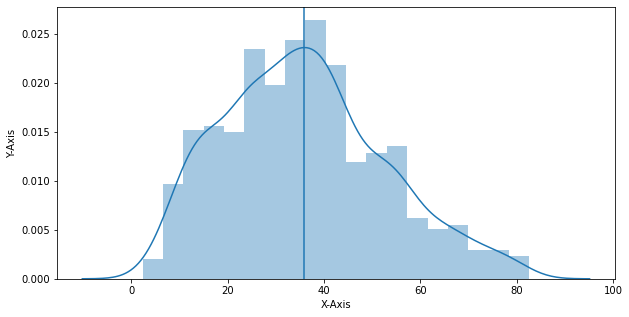

In [26]:
plt.figure(figsize=(10,5))
sns.distplot(df['strength'],kde=True)
plt.axvline(x=df['strength'].mean())
plt.xlabel('X-Axis')
plt.ylabel('Y-Axis')
plt.show()

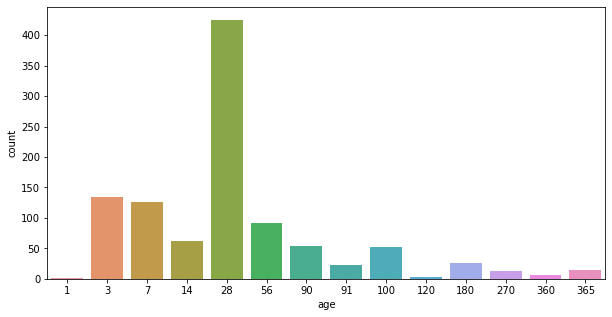

In [27]:
plt.figure(figsize=(10,5))
sns.countplot(df['age'])
plt.show()

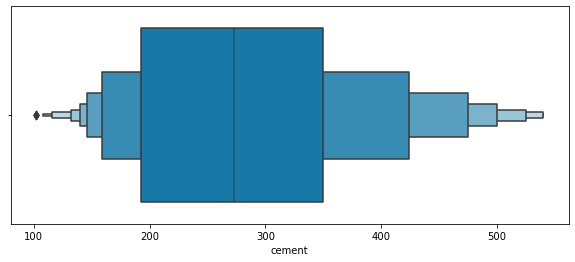

In [28]:
plt.figure(figsize=(10,4))
sns.boxenplot(df['cement'],palette='winter')
plt.show()

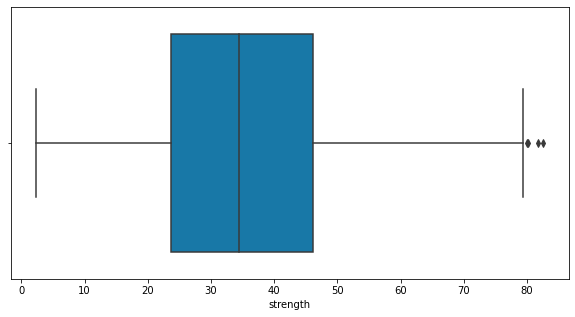

In [29]:
plt.figure(figsize=(10,5))
sns.boxplot(df['strength'],palette='winter')
plt.show()

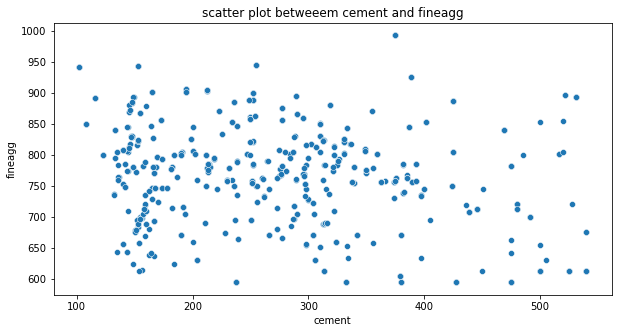

In [30]:
# Scatter plot between "cement" and "fineagg"
plt.figure(figsize=(10,5))
sns.scatterplot(df['cement'],df['fineagg'])
plt.xlabel('cement')
plt.ylabel('fineagg')
plt.title('scatter plot betweeem cement and fineagg')
plt.show()

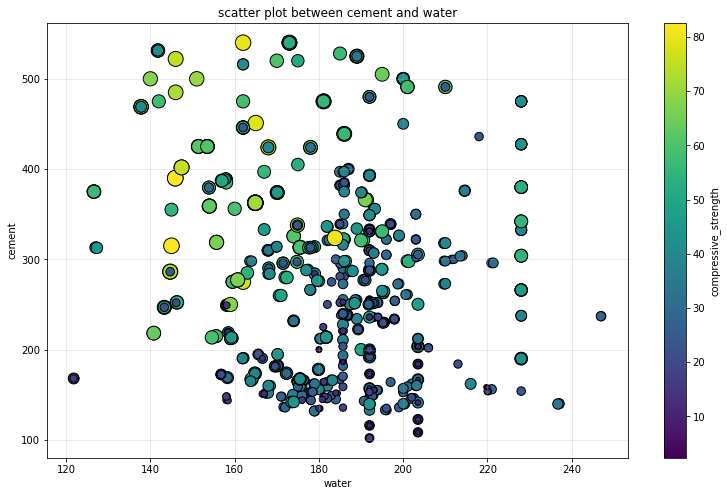

In [31]:
# Scatter plot between "cement" and "water"
fig = plt.figure(figsize=(13,8))
ax = fig.add_subplot(111)
plt.scatter(df["water"], df["cement"], c=df["strength"], s=df["strength"]*3,
            linewidth=1, edgecolor="k", cmap="viridis")
ax.set_facecolor("w")
ax.set_xlabel("water")
ax.set_ylabel("cement")
lab = plt.colorbar()
lab.set_label("compressive_strength")
plt.title("scatter plot between cement and water")
plt.grid(True,alpha=.3)
plt.show()

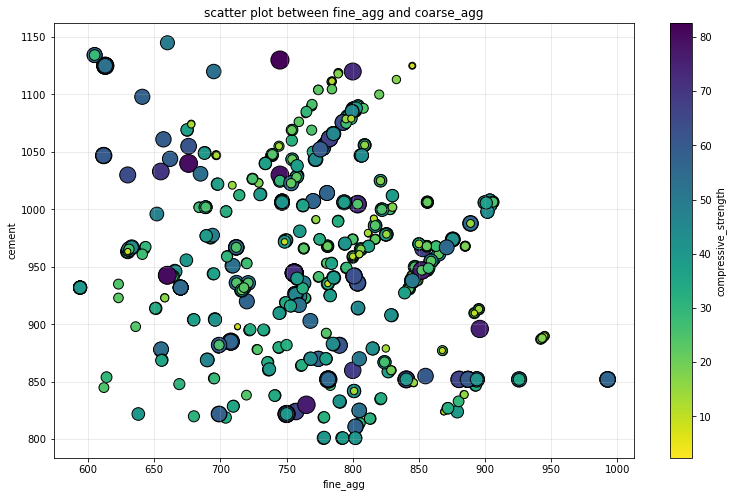

In [32]:
# Scatter plot between "cement" and "water"
fig = plt.figure(figsize=(13,8))
ax = fig.add_subplot(111)
plt.scatter(df["fineagg"], df["coarseagg"], c=df["strength"], s=df["strength"]*4,
            linewidth=1, edgecolor="k", cmap="viridis_r")
ax.set_facecolor("w")
ax.set_xlabel("fine_agg")
ax.set_ylabel("cement")
lab = plt.colorbar()
lab.set_label("compressive_strength")
plt.title("scatter plot between fine_agg and coarse_agg")
plt.grid(True,alpha=.3)
plt.show()

Text(0.5, 1.0, 'cement Vs ash')

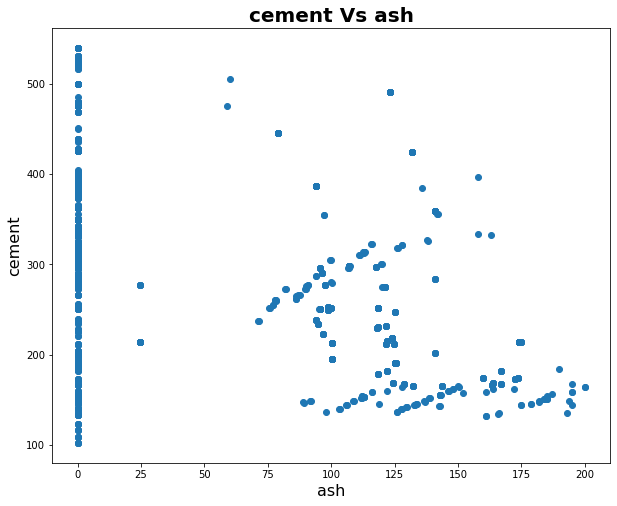

In [33]:
plt.figure(figsize=(10,8))
plt.scatter(df['ash'],df['cement'])

plt.xlabel('ash', fontsize=16)
plt.ylabel('cement', fontsize=16)

plt.title('cement Vs ash', fontsize = 20, fontweight = 'bold')

Text(0.5, 1.0, 'Age Vs Strength')

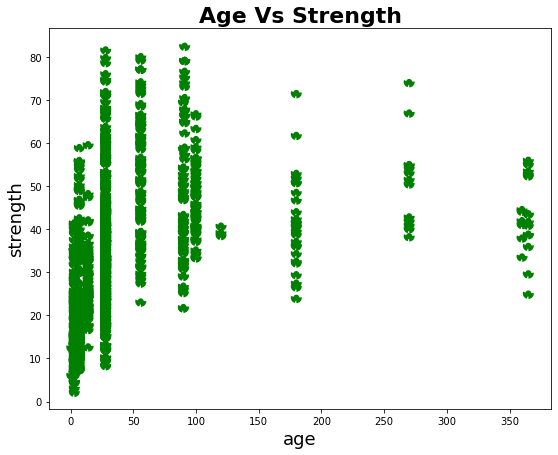

In [34]:
plt.figure(figsize=(9,7))
x = df['age']
y = df['strength']
plt.scatter(df['age'], df['strength'], color='green', linewidth=5, linestyle='dotted')

plt.xlabel('age', fontsize=18)
plt.ylabel('strength', fontsize=18)

plt.title('Age Vs Strength', fontsize=22, fontweight='bold')

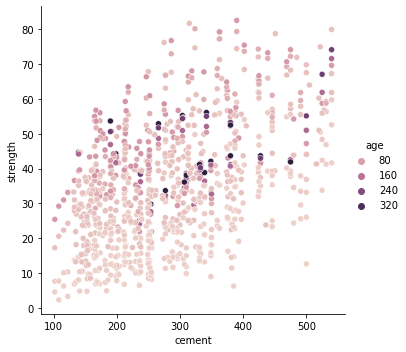

In [35]:
sns.relplot(x='cement', y='strength', data=df, hue="age")

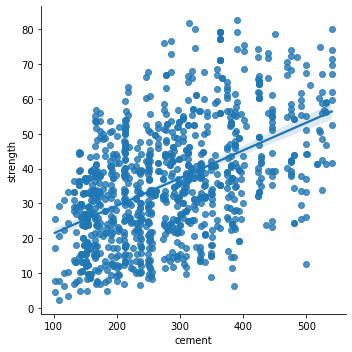

In [36]:
sns.lmplot(x='cement', y='strength', data=df)

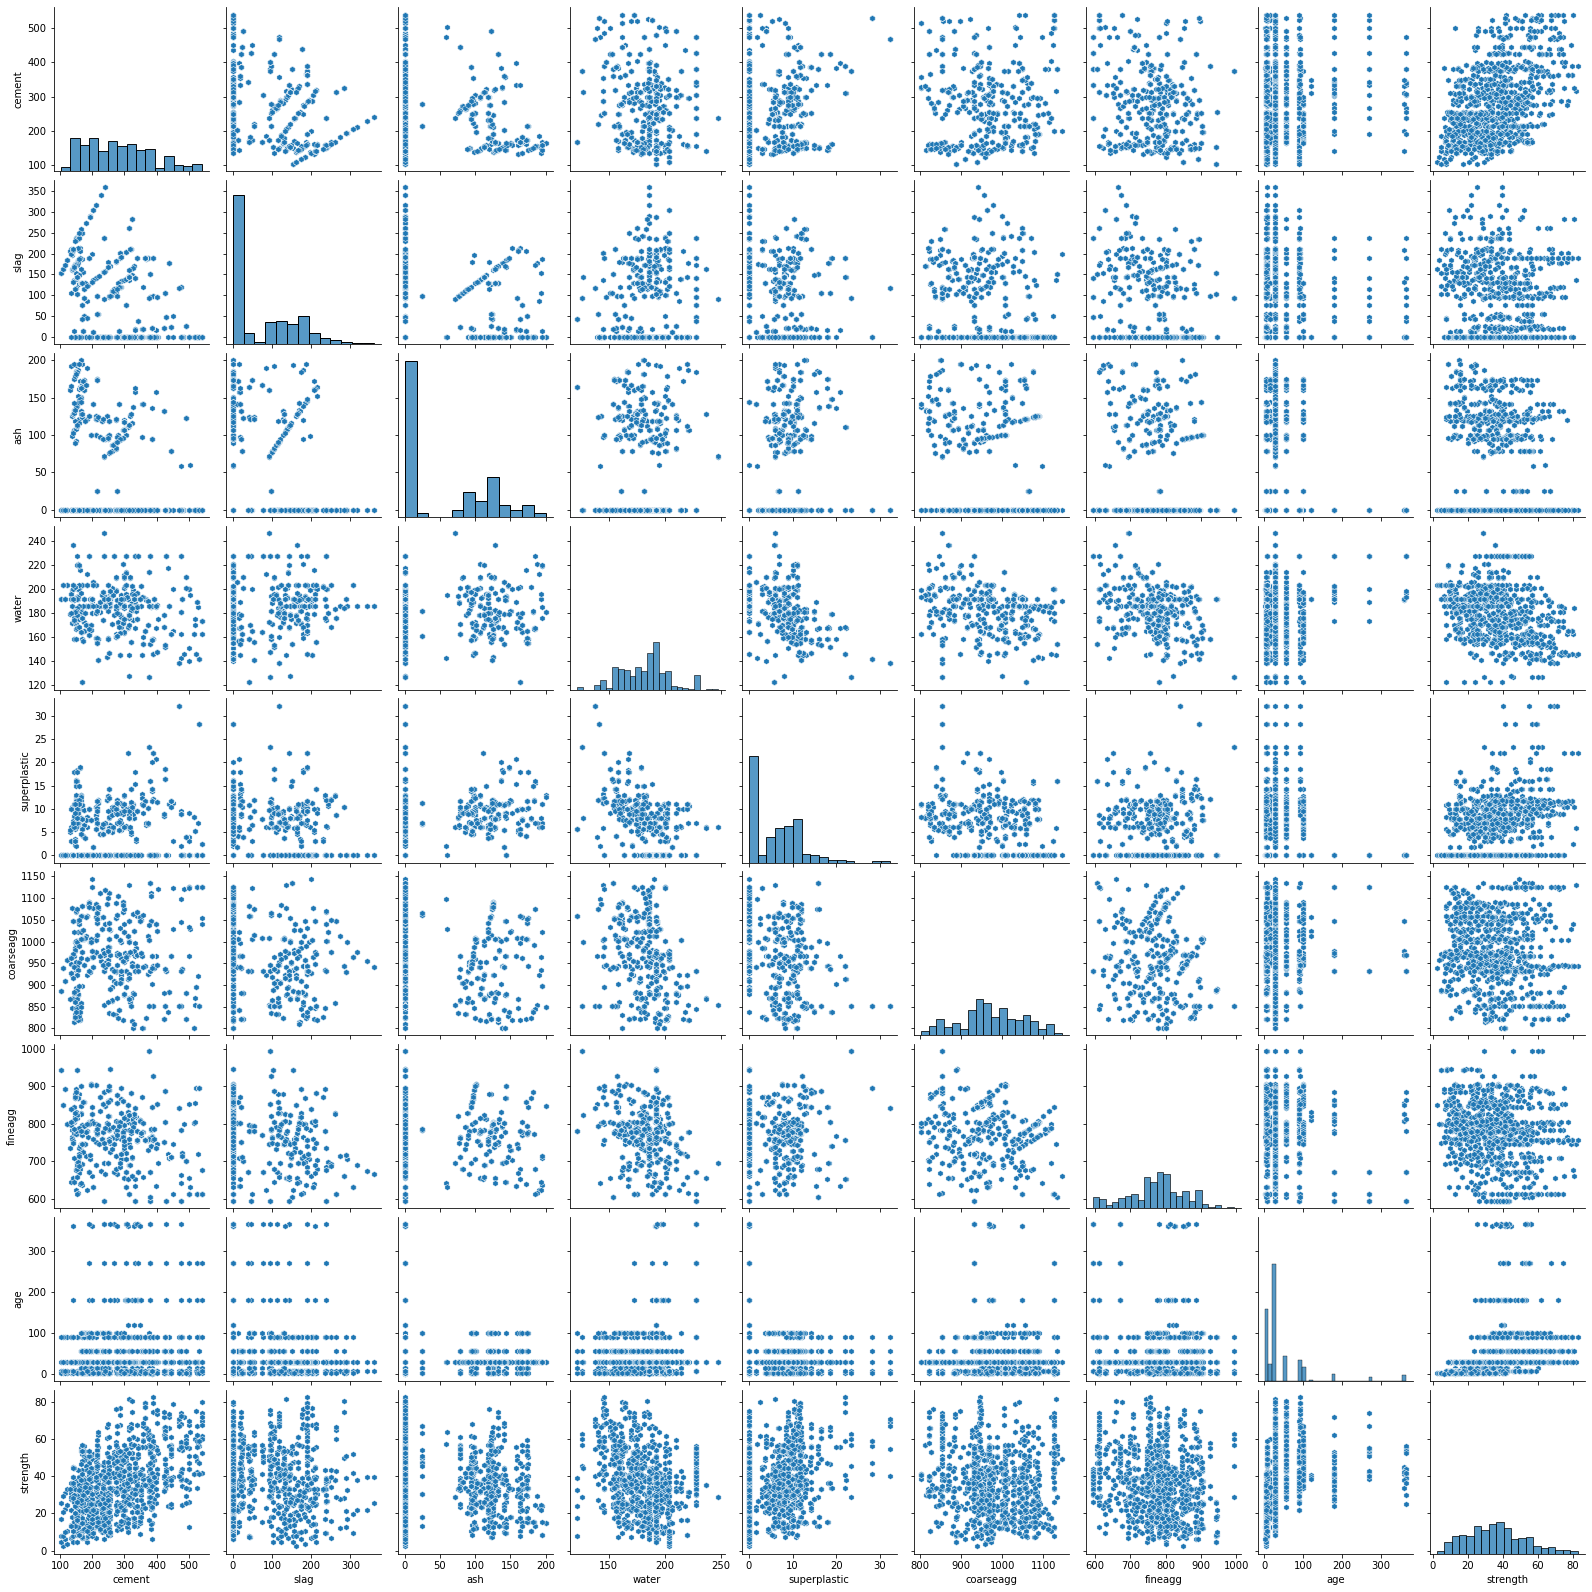

In [37]:
sns.pairplot(df,markers="h")
plt.show()

In [38]:
df_IQR = df[["slag", "water", "superplastic","age", "strength"]]
Q1 = df_IQR.quantile(0.25)
Q3 = df_IQR.quantile(0.75)
IQR =  Q3 - Q1
IQR

slag            142.950
water            27.100
superplastic     10.200
age              49.000
strength         22.425
dtype: float64

In [39]:
df_IQR_clean = df_IQR[~((df_IQR < (Q1 - 1.5*IQR)) | (df_IQR > (Q3 + 1.5*IQR))).any(axis=1)]

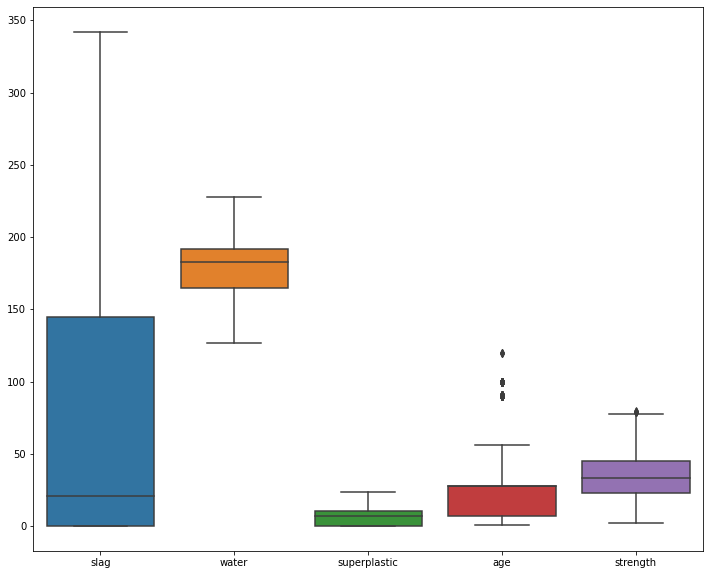

In [40]:
# boxplot() showing outlier
box = df_IQR_clean
plt.figure(figsize=(12,10))
sns.boxplot(data=box)
plt.show()

In [41]:
# Checking the skewness of "cement" attributes
df['cement'].skew()

0.5094811788717731

In [42]:
# performing the log transformation using numpy
cube_root_cement =np.cbrt(df['cement'])
cube_root_cement

0       5.208517
1       5.527684
2       6.299605
3       6.431228
4       5.369374
          ...   
1025    5.129928
1026    8.099284
1027    6.513974
1028    6.993191
1029    8.143253
Name: cement, Length: 1030, dtype: float64

In [43]:
#calculate skewness after calculating the cube root
cube_root_cement.skew()

0.08371630219956572

<AxesSubplot:xlabel='cement', ylabel='Density'>

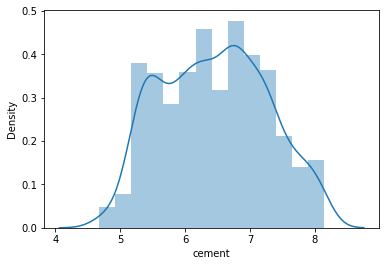

In [45]:
# visualising by density plot
sns.distplot(cube_root_cement)

In [46]:
#checking the skwness of slag attributes
df['slag'].skew()

0.8007168956061774

<AxesSubplot:xlabel='slag', ylabel='Density'>

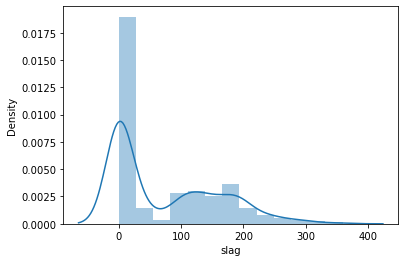

In [47]:
sns.distplot(df['slag'], hist=True)

In [48]:
# Independant variable
X = df.drop(['strength','cement','water'], axis=1)
# Dependant variable 
y = df['strength']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=4)

In [50]:
# shape of X & Y test / train
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(824, 6) (206, 6) (824,) (206,)


In [51]:
scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)

In [52]:
LinReg = LinearRegression()
LinReg.fit(X_train,y_train)

LinearRegression()

In [53]:
#lasso regression
lasso = Lasso()
lasso.fit(X_train,y_train)

Lasso()

In [54]:
#Ridge regression
ridge = Ridge()
ridge.fit(X_train,y_train)

Ridge()

In [55]:
y_pred_LinReg = LinReg.predict(X_test)
y_pred_lasso  =lasso.predict(X_test)
y_pred_ridge = ridge.predict(X_test)

In [56]:
y_pred_train_LinReg = LinReg.predict(X_train)

In [57]:
print("Train Score {:.2f} & Test Score {:.2f}".format(LinReg.score(X_train, y_train), LinReg.score(X_test, y_test)))
print("Train Score {:.2f} & Test Score {:.2f}".format(lasso.score(X_train, y_train), lasso.score(X_test, y_test)))
print("Train Score {:.2f} & Test Score {:.2f}".format(ridge.score(X_train, y_train), ridge.score(X_test, y_test)))

Train Score 0.39 & Test Score 0.41
Train Score 0.39 & Test Score 0.42
Train Score 0.39 & Test Score 0.41


In [58]:
print("Model\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")

print("""LinearRegression \t {:.2f} \t\t {:.2f} \t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_LinReg)),
            mean_squared_error(y_test, y_pred_LinReg),
            mean_absolute_error(y_test, y_pred_LinReg),
            r2_score(y_test, y_pred_LinReg)))

print("""LassoRegression \t {:.2f} \t\t {:.2f} \t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_lasso)),
            mean_squared_error(y_test, y_pred_lasso),
            mean_absolute_error(y_test, y_pred_lasso),
            r2_score(y_test, y_pred_lasso)))

print("""RidgeRegression \t {:.2f} \t\t {:.2f} \t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_ridge)),
            mean_squared_error(y_test, y_pred_ridge),
            mean_absolute_error(y_test, y_pred_ridge),
            r2_score(y_test, y_pred_ridge)))


Model			 RMSE 		 MSE 		 MAE 		 R2
LinearRegression 	 12.00 		 143.98 	9.50 		0.41
LassoRegression 	 11.99 		 143.87 	9.51 		0.42
RidgeRegression 	 12.00 		 143.98 	9.50 		0.41


Train Score 0.99 & Test Score 0.64
Model				 RMSE 		 MSE 		 MAE 		 R2
Decision Tree Regressor 	 9.41 		 88.59 		5.87 		0.64


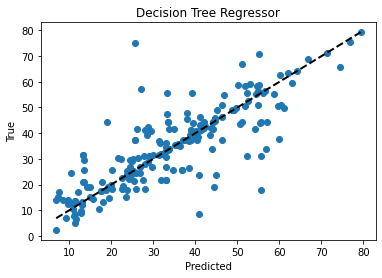

In [59]:
DT = DecisionTreeRegressor()
DT.fit(X_train,y_train)

y_pred_DT = DT.predict(X_test)
print("Train Score {:.2f} & Test Score {:.2f}".format(DT.score(X_train, y_train), DT.score(X_test, y_test)))

print("Model\t\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""Decision Tree Regressor \t {:.2f} \t\t {:.2f} \t\t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_DT)),
            mean_squared_error(y_test, y_pred_DT),
            mean_absolute_error(y_test, y_pred_DT),
            r2_score(y_test, y_pred_DT)))

plt.scatter(y_test, y_pred_DT)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)

plt.xlabel("Predicted")
plt.ylabel("True")

plt.title("Decision Tree Regressor")

plt.show()

Parameters : {'max_depth': 9, 'min_samples_split': 10}
Train Score 0.89 & Test Score 0.66


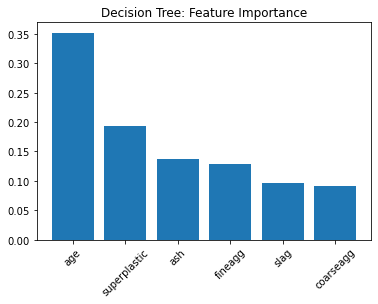

In [60]:
# Tuning Hyperparameter max_depth and min_sam_split of decision tree regressor
max_d = list(range(1,10))
min_sam_split= list(range(10,50,15))
gridcv = GridSearchCV(DT,param_grid={'max_depth':max_d,'min_samples_split':min_sam_split},n_jobs=-1)
gridcv.fit(X_train,y_train)

print("Parameters :", gridcv.best_params_)
print("Train Score {:.2f} & Test Score {:.2f}".format(gridcv.score(X_train, y_train), gridcv.score(X_test, y_test)))

# Lets find out the feature importance based on DecisionTree Model
importances = DT.feature_importances_
col = X.columns.tolist()
indices= importances.argsort()[::-1]
names = [col[i] for i in indices]

# Plotting Feature importance Chart
plt.title("Decision Tree: Feature Importance")
plt.bar(range(X.shape[1]),importances[indices])
plt.xticks(range(X.shape[1]),names,rotation=45);

In [61]:
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)

y_pred_rfr = rfr.predict(X_test)
print("Train Score {:.2f} & Test Score {:.2f}".format(rfr.score(X_train, y_train),rfr.score(X_test, y_test)))

print("Model\t\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""Random Forest Regressor \t {:.2f} \t\t {:.2f} \t\t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_rfr)),
            mean_squared_error(y_test, y_pred_rfr),
            mean_absolute_error(y_test, y_pred_rfr),
            r2_score(y_test, y_pred_rfr)))

Train Score 0.96 & Test Score 0.79
Model				 RMSE 		 MSE 		 MAE 		 R2
Random Forest Regressor 	 7.12 		 50.63 		5.07 		0.79


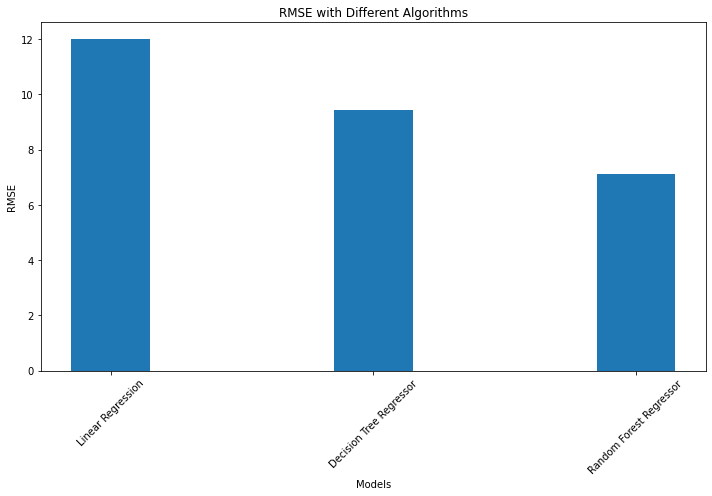

In [64]:
models = [LinReg, DT, rfr]
names = ["Linear Regression", "Decision Tree Regressor", "Random Forest Regressor"]
rmses = []

for model in models:
    rmses.append(np.sqrt(mean_squared_error(y_test, model.predict(X_test))))

x = np.arange(len(names)) 
width = 0.3

fig, ax = plt.subplots(figsize=(10,7))
rects = ax.bar(x, rmses, width)
ax.set_ylabel('RMSE')
ax.set_xlabel('Models')

ax.set_title('RMSE with Different Algorithms')

ax.set_xticks(x)
ax.set_xticklabels(names, rotation=45)

fig.tight_layout()